# Импорт необходимых библиотек

In [267]:
import pandas as pd
import geopandas as gpd
import folium
import folium.plugins
# from pyproj import Transformer
import pyproj
import numpy as np
import seaborn as sns
from scipy.spatial import distance

## Суть задания:

Необходимо прочитать .csv "test.csv" в котором записаны геоданные (информация в заголовках) в системе координат `source` (нужно будет с помощью pyproj перевести в `target` для отображения на карте с помощью библиотеки folium). Предвартельно нужно будет преобразовать df в формат geopandas.

Нужно выяснить сколько было различных проездов автомобиля (прерывания более 0.5 секунды), визуализировать эти маршруты, визуализировать графики скорости проездов.

In [1]:
source = "EPSG:32637"
target = "EPSG:4326"

.csv(source) -> geoDF(source) -pyproj> geoDF(target) -> отрисовать с помощью folium

In [274]:
df = pd.read_csv('test.csv')

In [275]:
epsg4326=pyproj.Proj("+init=EPSG:4326")
epsg32637=pyproj.Proj("+init=EPSG:32637")
Lat, Long = pyproj.transform(epsg32637, epsg4326, list(df['X']),list(df['Y']))

In [276]:
df['Longitude'] = dfepsgY
df['Latitude'] = dfepsgX

In [277]:
gdf = gpd.GeoDataFrame(df)

In [278]:
polylist = []
speed = []
colorlist = ['#0048BA', '#E52B50', '#3B7A57', '#FFBF00', '#9966CC', '#007FFF', '#660000','#DE5D83', '#66FF00','#00BFFF', '#FF0800']
for i, stream_num in enumerate(gdf['panoram stream number'].unique()):
    polylinedf = df.loc[gdf['panoram stream number'] == stream_num]
    polylinedf['speed'] = ((polylinedf[['X','Y','Z']].diff() ** 2).sum(axis=1)) ** 0.5 / polylinedf['GPS time'].diff() * 3.6
    polylist.append(polylinedf)

In [279]:
polylist[0]

,Unnamed: 0,panoram stream number,frame name,GPS time,X,Y,Z,roll,pitch,heading,date time,Longitude,Latitude,speed
0,0,36,ladybug_panoramic_000000,372238.374093,399070.538384,6.186249e+06,177.289079,178.355788,178.465146,13.182995,2020-11-12 07:23:58,55.811275,37.389467,NaN
1,1,36,ladybug_panoramic_000001,372238.874115,399072.484287,6.186258e+06,177.252496,178.469506,178.115046,13.246203,2020-11-12 07:23:58,55.811356,37.389495,65.900996
2,2,36,ladybug_panoramic_000002,372239.374138,399074.437530,6.186267e+06,177.218097,178.502584,178.319568,13.085446,2020-11-12 07:23:59,55.811438,37.389522,66.847744
3,3,36,ladybug_panoramic_000003,372239.874160,399076.386642,6.186276e+06,177.172916,178.456564,177.944437,12.959536,2020-11-12 07:23:59,55.811521,37.389550,67.523825
4,4,36,ladybug_panoramic_000004,372240.374182,399078.315928,6.186285e+06,177.127745,178.859275,178.618339,12.458477,2020-11-12 07:24:00,55.811604,37.389578,68.252316
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
57,57,36,ladybug_panoramic_000057,372266.875367,399173.201627,6.186762e+06,169.079190,178.696118,-179.534623,12.414035,2020-11-12 07:24:26,55.815910,37.390914,62.922910
58,58,36,ladybug_panoramic_000058,372267.375389,399174.921776,6.186771e+06,168.820853,178.483045,-179.623424,12.250150,2020-11-12 07:24:27,55.815987,37.390938,62.632922
59,59,36,ladybug_panoramic_000059,372267.875412,399176.613606,6.186779e+06,168.562510,178.559326,-179.505842,11.993371,2020-11-12 07:24:27,55.816063,37.390962,62.383664
60,60,36,ladybug_panoramic_000060,372268.375434,399178.252314,6.186788e+06,168.304836,178.418475,-179.589118,11.810852,2020-11-12 07:24:28,55.816140,37.390985,62.071850


In [303]:
moscow_map = folium.Map(location=[55.81, 37.50], zoom_start=12)

folium.plugins.Fullscreen(
    position="topright",
    title="Expand",
    title_cancel="Exit",
    force_separate_button=True,
).add_to(moscow_map)

for i, poly in enumerate(polylists):
    folium.plugins.AntPath(np.c_[poly['Longitude'], poly['Latitude']], color=colorlist[i], popup=f'route #{i}', delay=1000).add_to(moscow_map)

In [304]:
moscow_map

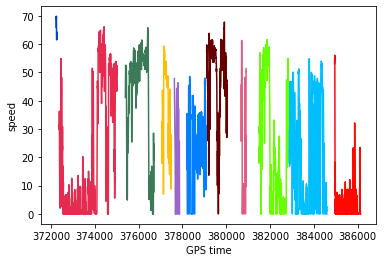

In [270]:
for i, poly in enumerate(polylist):
    sns.lineplot(data=poly, x='GPS time', y='speed', color=colorlist[i])

<AxesSubplot:xlabel='GPS time', ylabel='speed'>

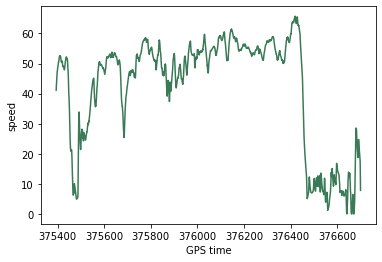

In [286]:
sns.lineplot(data=polylist[2], x='GPS time', y='speed', color=colorlist[2])

<AxesSubplot:xlabel='GPS time', ylabel='speed'>

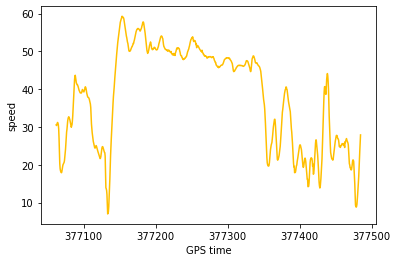

In [290]:
sns.lineplot(data=polylist[3], x='GPS time', y='speed', color=colorlist[3])

<AxesSubplot:xlabel='GPS time', ylabel='speed'>

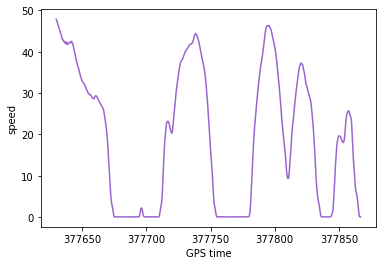

In [291]:
sns.lineplot(data=polylist[4], x='GPS time', y='speed', color=colorlist[4])

<AxesSubplot:xlabel='GPS time', ylabel='speed'>

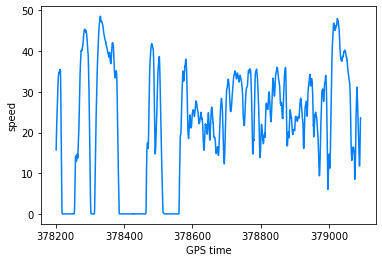

In [292]:
sns.lineplot(data=polylist[5], x='GPS time', y='speed', color=colorlist[5])

<AxesSubplot:xlabel='GPS time', ylabel='speed'>

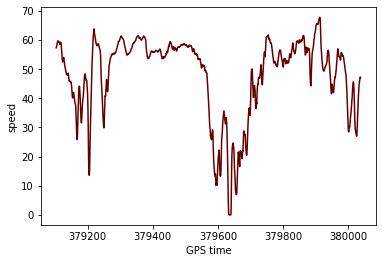

In [293]:
sns.lineplot(data=polylist[6], x='GPS time', y='speed', color=colorlist[6])

<AxesSubplot:xlabel='GPS time', ylabel='speed'>

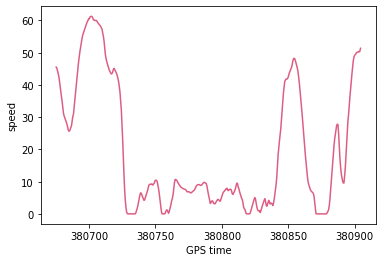

In [294]:
sns.lineplot(data=polylist[7], x='GPS time', y='speed', color=colorlist[7])